In [2]:
user = "Alex"
pathtorepo = "C:\\Users\\" * user * "\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include("C:\\Users\\" * user * "\\Desktop\\dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


jacob_TM_ (generic function with 1 method)

In [3]:
using StaticArrays, DifferentialEquations, DynamicalSystems
E, x, y  = 0..40, 0..1,  0..1
box = E × x × y
using CairoMakie

In [4]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [5]:
time = 500; tt = 1000; tstep = 0.001
integ_set = (alg = Vern9(), adaptive = false, dt = tstep)

(alg = Vern9(stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false), lazy = true), adaptive = false, dt = 0.001)

In [6]:
I0 = -1.6; U0 = 0.265;
p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = [8.638526524981895, 0.7320692774159767, 0.40718205935401675]
println("last point trajectory:$u0")

last point trajectory:[8.638526524981895, 0.7320692774159767, 0.40718205935401675]


In [7]:
ds = CoupledODEs(TM, u0, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.265, 0.305, 0.3, -1.6]
 time:          0.0
 state:         [8.638526524981895, 0.7320692774159767, 0.40718205935401675]


In [8]:
tr, trange = trajectory(ds, time; Δt = integ_set.dt, Ttr = tt);

In [13]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_)

(3-dimensional StateSpaceSet{Float64} with 1 points, Vector{ComplexF64}[[-6.810611387343414 + 0.0im, 1.7857108302794698 - 14.372652597997153im, 1.7857108302794698 + 14.372652597997153im]], Bool[0])

In [12]:
lb_size = 35; tck_size = 30;

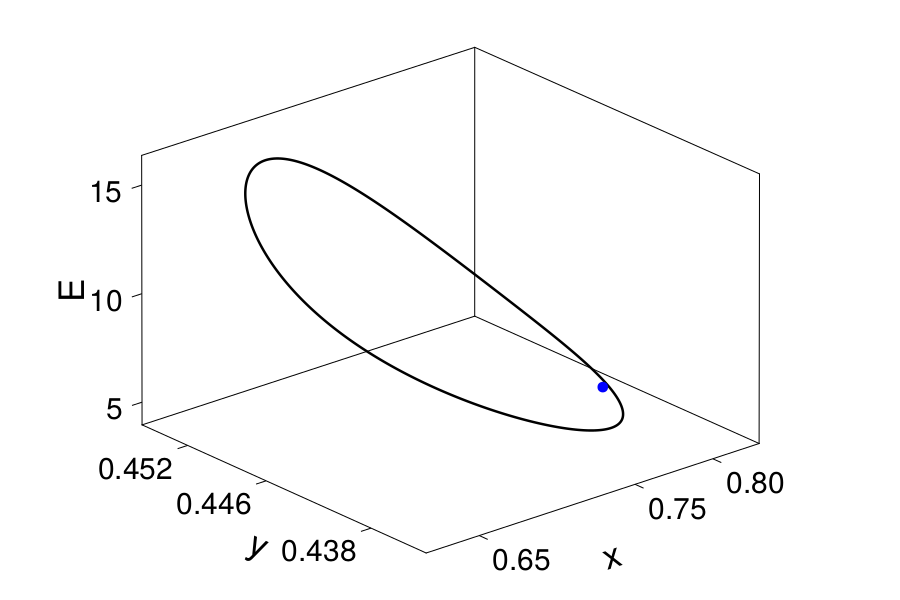

CairoMakie.Screen{IMAGE}


In [19]:
ts, tf = 1, 100000
indexx,indexy,indexz = 2, 3, 1
f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false,
                yticks = [0.438, 0.446, 0.452], xticks = [0.65, 0.75, 0.80])
                
lines!(axis3, tr[ts:tf, indexx], tr[ts:tf, indexy], tr[ts:tf, indexz], linewidth = 2.5, color = :black)
scatter!(fp[1][indexx], fp[1][indexy], fp[1][indexz], color = :blue, markersize = 15.0)
display(f)

In [16]:
save("limit_cycle.eps",f)

CairoMakie.Screen{EPS}
